In [22]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
print("We're using TF", tf.__version__)
#print("We are using Keras", tf.keras.__version__)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
    # Visible devices must be set at program startup
        print(e)

# Проверяем что у нас работает GPU
tf.test.gpu_device_name()

#GPU count and name
#!nvidia-smi -L

#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
#!nvidia-smi

We're using TF 2.12.1


''

# Problem

In [24]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Трейн:", x_train.shape, y_train.shape)
print("Тест:", x_test.shape, y_test.shape)

Трейн: (50000, 32, 32, 3) (50000, 1)
Тест: (10000, 32, 32, 3) (10000, 1)


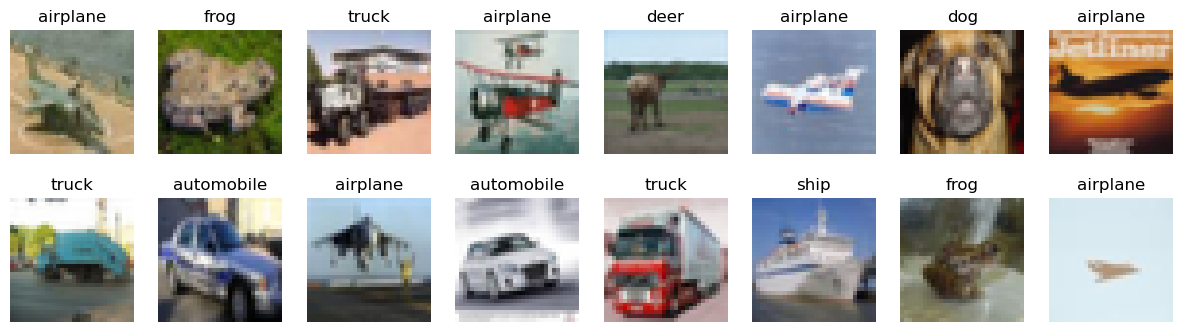

In [25]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

# посмотрим на примеры картинок
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [26]:
# нормализуем входы
x_train2 = x_train.astype('float32') / 255 - 0.5
x_test2 = x_test.astype('float32') / 255 - 0.5

# конвертируем метки в np.array (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [27]:
# слои, которые нам пригодятся
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def make_default_model():
    model = Sequential()

    model.add(L.Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(L.MaxPool2D())
    model.add(L.Dropout(rate=0.25))
    model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(L.MaxPool2D())
    model.add(L.Dropout(rate=0.25))

    model.add(L.Flatten())
    model.add(L.Dense(256, activation='softmax'))
    model.add(L.Dropout(rate=0.5))
    model.add(L.Dense(10, activation='softmax'))

    return model

K.clear_session()
model = make_default_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

In [28]:
def train_model(make_model_func=make_default_model, optimizer="adam"):
  BATCH_SIZE = 32
  EPOCHS = 10

  K.clear_session()
  model = make_model_func()

  model.compile(
      loss='categorical_crossentropy',
      optimizer=optimizer,
      metrics=['accuracy']
  )

  model.fit(
      x_train2, y_train2,  # нормализованные данные
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=(x_test2, y_test2),
      shuffle=False
  )

  return model

In [29]:
# учим дефолтную архитектуру
train_model()

Epoch 1/10
1563/1563 [==============================] - 99s 63ms/step - loss: 2.2087 - accuracy: 0.1548 - val_loss: 2.1087 - val_accuracy: 0.2518
Epoch 2/10
1562/1563 [============================>.] - ETA: 0s - loss: 2.0572 - accuracy: 0.2334

KeyboardInterrupt: 